In [3]:
import nltk
from nltk.stem import WordNetLemmatizer

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rayanbhat/nltk_data...


True

In [10]:
lemmatizer=WordNetLemmatizer()

In [11]:
lemmatizer.lemmatize('unnecessary')

'unnecessary'

In [12]:
lemmatizer.lemmatize('running')

'running'

In [13]:
lemmatizer.lemmatize('running',pos=wordnet.VERB)

'run'

In [14]:
import string

In [18]:
def get_pos_word(word):
    if word.startswith('J'):
        return wordnet.ADJ
    elif word.startswith('V'):
        return wordnet.VERB
    elif word.startswith('N'):
        return wordnet.NOUN
    elif word.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rayanbhat/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [24]:
sentence="The cat was following the bird as it flew by".split()

In [80]:
sentence

['The', 'cat', 'was', 'following', 'the', 'bird', 'as', 'it', 'flew', 'by']

In [25]:
words_with_tags=nltk.pos_tag(sentence)

In [26]:
words_with_tags

[('The', 'DT'),
 ('cat', 'NN'),
 ('was', 'VBD'),
 ('following', 'VBG'),
 ('the', 'DT'),
 ('bird', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('flew', 'VBD'),
 ('by', 'IN')]

In [29]:
lemmatized_sentence=""
for words,tags in words_with_tags:
    lemmatized_sentence+=lemmatizer.lemmatize(words,pos=get_pos_word(tags))+" "
    

In [30]:
lemmatized_sentence

'The cat be follow the bird a it fly by '

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import nltk

In [32]:
df=pd.read_csv('CSV/bbc_text_cls.csv')

In [33]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [34]:
X=df['text']
y=df['labels']

<AxesSubplot: >

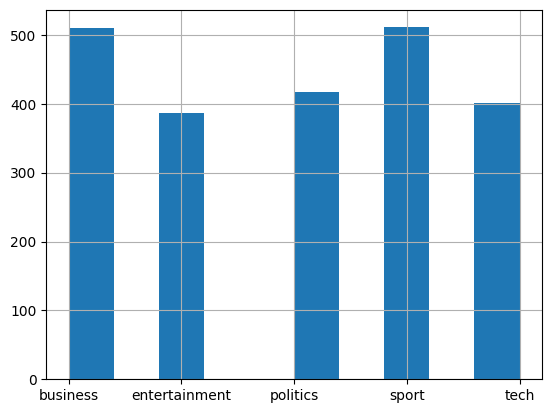

In [35]:
y.hist()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
#Simple Vectorization
vectorizer=CountVectorizer()
Xtrain1=vectorizer.fit_transform(X_train)
Xtest1=vectorizer.transform(X_test)
print('Sparsity: ',Xtrain1.nnz/np.prod(Xtrain1.shape))
Multinomial=MultinomialNB()
Multinomial.fit(Xtrain1,y_train)
print(Multinomial.score(Xtrain1,y_train))
print(Multinomial.score(Xtest1,y_test))

Sparsity:  0.008113533777887899
0.9946308724832215
0.9768707482993197


In [64]:
#Using Stopwords
vectorizer=CountVectorizer(stop_words='english')
Xtrain2=vectorizer.fit_transform(X_train)
Xtest2=vectorizer.transform(X_test)
print('Sparsity: ',Xtrain2.nnz/np.prod(Xtrain2.shape))
Multinomial2=MultinomialNB()
Multinomial2.fit(Xtrain2,y_train)
print(Multinomial2.score(Xtrain2,y_train))
print(Multinomial2.score(Xtest2,y_test))

Sparsity:  0.005884431873608602
0.9959731543624161
0.9768707482993197


In [83]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
def get_pos_word(word):
    if word.startswith('J'):
        return wordnet.ADJ
    elif word.startswith('V'):
        return wordnet.VERB
    elif word.startswith('N'):
        return wordnet.NOUN
    elif word.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
class Token_Lemmatizer:
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    def __call__(self,doc):
        tokens=doc.split(" ")
        words_and_tags=nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word,pos=get_pos_word(tag)) for word,tag in words_and_tags]

In [87]:
vectorizer3=CountVectorizer(tokenizer=Token_Lemmatizer())
Xtrain3=vectorizer3.fit_transform(X_train)
Xtest3=vectorizer3.transform(X_test)
print('Sparsity: ',Xtrain3.nnz/np.prod(Xtrain3.shape))
Multinomial3=MultinomialNB()
Multinomial3.fit(Xtrain3,y_train)
print(Multinomial3.score(Xtrain3,y_train))
print(Multinomial3.score(Xtest3,y_test))

/Users/rayanbhat/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Sparsity:  0.004213179925542495
0.9979865771812081
0.9619047619047619


In [89]:
#Stemming
from nltk.stem.porter import PorterStemmer
class Token_Stemmer:
    def __init__(self):
        self.ps=PorterStemmer()
    def __call__(self,doc):
        tokens=doc.split(" ")
        return [self.ps.stem(word) for word in tokens]

In [95]:
vectorizer4=CountVectorizer(tokenizer=Token_Stemmer())
Xtrain4=vectorizer4.fit_transform(X_train)
Xtest4=vectorizer4.transform(X_test)
print('Sparsity: ',Xtrain4.nnz/np.prod(Xtrain4.shape))
Multinomial4=MultinomialNB()
Multinomial4.fit(Xtrain4,y_train)
print(Multinomial4.score(Xtrain4,y_train))
print(Multinomial4.score(Xtest4,y_test))

/Users/rayanbhat/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Sparsity:  0.004562600529648767
0.9953020134228188
0.9659863945578231
